<h1>Finance: Simple Returns, Daily Returns, Volatility (FAANG)</h1>

In [0]:
import datetime as dt
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [0]:
#Stock Symbols (FAANG)
symbols = ['FB','AMZN','AAPL','NFLX','GOOG']

#Start date
start = '2013-01-01'

In [4]:
#Today's date
today = dt.datetime.today().strftime('%Y-%m-%d')

today

'2020-03-03'

In [5]:
num_assets = len(symbols)

print('You have {0} assets'.format(str(num_assets)))

You have 5 assets


In [0]:
#Get the stock prices

def prices(stocks=symbols,start=start,end=today,col='Adj Close'):
  data=web.DataReader(stocks,data_source='yahoo',start=start,end=end)[col]
  return data

In [7]:
my_stocks = prices(symbols)

my_stocks

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,68.687538,13.144286,360.274597
2013-01-03,27.770000,258.480011,67.820526,13.798572,360.483826
2013-01-04,28.760000,259.149994,65.931404,13.711429,367.607117
2013-01-07,29.420000,268.459991,65.543602,14.171429,366.003143
2013-01-08,29.059999,266.380005,65.719994,13.880000,365.280823
...,...,...,...,...,...
2020-02-26,197.199997,1979.589966,292.649994,379.239990,1393.180054
2020-02-27,189.750000,1884.300049,273.519989,371.709991,1318.089966
2020-02-28,192.470001,1883.750000,273.359985,369.029999,1339.329956


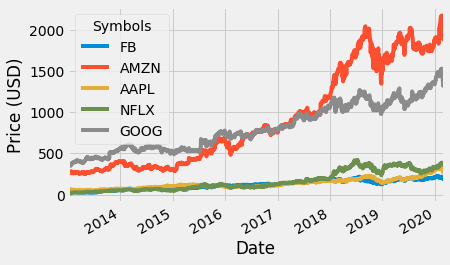

In [8]:
my_stocks.plot()
plt.ylabel('Price (USD)')
plt.show()

In [10]:
#Simple Returns
daily_simple_returns = my_stocks.pct_change(1) #one day

#Daily Simple Returns
daily_simple_returns

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012623,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002691,-0.020565,-0.001974
...,...,...,...,...,...
2020-02-26,0.002185,0.003472,0.015864,0.053181,0.003407
2020-02-27,-0.037779,-0.048136,-0.065368,-0.019855,-0.053898
2020-02-28,0.014335,-0.000292,-0.000585,-0.007210,0.016114


In [11]:
#Stock correlation (relation between stocks, ie if one stock goes up, another does as well)
daily_simple_returns.corr()

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Symbols,,,,,
FB,1.000000,0.474521,0.351159,0.317446,0.496118
AMZN,0.474521,1.000000,0.377109,0.407378,0.583967
AAPL,0.351159,0.377109,1.000000,0.205487,0.438414
NFLX,0.317446,0.407378,0.205487,1.000000,0.393345
GOOG,0.496118,0.583967,0.438414,0.393345,1.000000


In [12]:
#Covariance matrix for simple returns
#Measures how far numbers are from the mean; higher variance = higher risk, return, and volatility
daily_simple_returns.cov()

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Symbols,,,,,
FB,0.000418,0.000180,0.000115,0.000187,0.000150
AMZN,0.000180,0.000344,0.000112,0.000217,0.000160
AAPL,0.000115,0.000112,0.000256,0.000095,0.000104
NFLX,0.000187,0.000217,0.000095,0.000828,0.000167
GOOG,0.000150,0.000160,0.000104,0.000167,0.000218


In [13]:
#Variance (diagonal of covariance)
daily_simple_returns.var()

Symbols
FB      0.000418
AMZN    0.000344
AAPL    0.000256
NFLX    0.000828
GOOG    0.000218
dtype: float64

In [14]:
#Volatility (standard deviation)
#Lowest returns for google
daily_simple_returns.std()

Symbols
FB      0.020453
AMZN    0.018541
AAPL    0.015999
NFLX    0.028771
GOOG    0.014772
dtype: float64

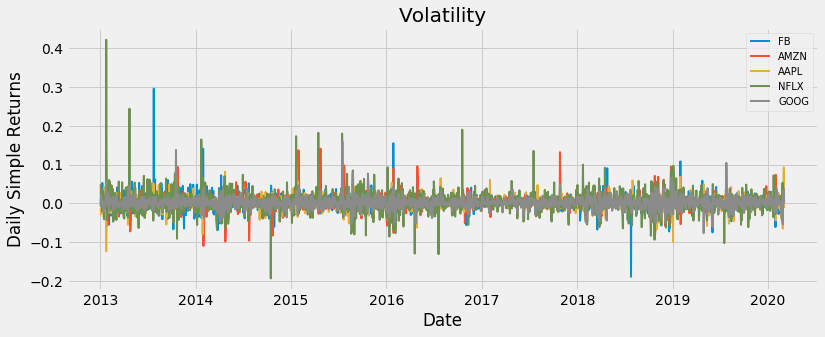

In [22]:
#Visualize daily simple returns
plt.figure(figsize=(12,4.5))

for i in daily_simple_returns.columns.values:
  plt.plot(daily_simple_returns[i],lw=2,label=i)

plt.title('Volatility')
plt.xlabel('Date')
plt.ylabel('Daily Simple Returns')
plt.legend(loc='best',fontsize=10)
plt.show()

In [24]:
#Mean of the daily simple returns
daily_mean_simple_returns = daily_simple_returns.mean()

daily_mean_simple_returns

Symbols
FB      0.001280
AMZN    0.001299
AAPL    0.000938
NFLX    0.002278
GOOG    0.000857
dtype: float64

In [29]:
#Expected daily return
random_weights = np.array([0.4,0.1,0.3,0.1,0.1]) #40% to FB, 10% to AMZN, 30% AAPL, 10% NFLX, 10% GOOG

simple_return = np.sum(daily_mean_simple_returns * random_weights)

print('Daily expected return: '+str(simple_return))

Daily expected return: 0.0012367919933164023


In [30]:
#Yearly simple return (253 trading days)
print('Yearly expected return: '+str(simple_return*253))

Yearly expected return: 0.3129083743090498


In [33]:
#Growth of investment (total/cumulative returns)

daily_cumulative_simple_return = (daily_simple_returns+1).cumprod()

daily_cumulative_simple_return

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.991786,1.004547,0.987377,1.049777,1.000581
2013-01-04,1.027143,1.007151,0.959874,1.043147,1.020353
2013-01-07,1.050714,1.043333,0.954228,1.078144,1.015900
2013-01-08,1.037857,1.035249,0.956796,1.055972,1.013896
...,...,...,...,...,...
2020-02-26,7.042857,7.693405,4.260598,28.852080,3.866995
2020-02-27,6.776786,7.323074,3.982090,28.279207,3.658570
2020-02-28,6.873929,7.320936,3.979761,28.075317,3.717525


In [34]:
#GOOG daily simple returns day 3
(daily_simple_returns['GOOG'][1] + 1) * (daily_simple_returns['GOOG'][2] + 1)

1.0203525854692204

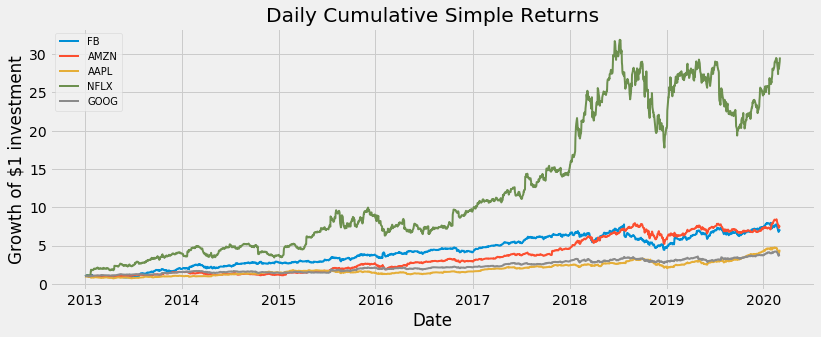

In [39]:
#Visualize daily cumulative simple returns

plt.figure(figsize=(12.2,4.5))
for i in daily_cumulative_simple_return.columns.values:
  plt.plot(daily_cumulative_simple_return.index,daily_cumulative_simple_return[i],lw=2,label=i)

plt.xlabel('Date')
plt.ylabel('Growth of $1 investment')
plt.title('Daily Cumulative Simple Returns')
plt.legend(loc='best',fontsize=10)
plt.show()